<a href="https://colab.research.google.com/github/Nathan2605/kmeans-proyect-4geeks/blob/main/KMEANS_poyecto4geeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##Paso 1: Cargar del conjunto de datos

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df = pd.read_csv(url)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df = df[["MedInc", "Latitude", "Longitude"]]

In [4]:
#split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

##Paso 2: Construir un K-Means

In [5]:
#kmeans
kmeans = KMeans(n_clusters = 6, random_state = 36, n_init = "auto")
kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=36)

In [6]:
#insertar columna cluster en X_train
etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_

X_train["cluster"] = etiquetas
X_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,0
8267,3.8125,33.77,-118.16,0
17445,4.1563,34.66,-120.48,0
14265,1.9425,32.69,-117.11,5
2271,3.5542,36.78,-119.80,1
...,...,...,...,...
11284,6.3700,33.78,-117.96,4
11964,3.0500,34.02,-117.43,5
5390,2.9344,34.03,-118.38,5
860,5.7192,37.58,-121.96,3


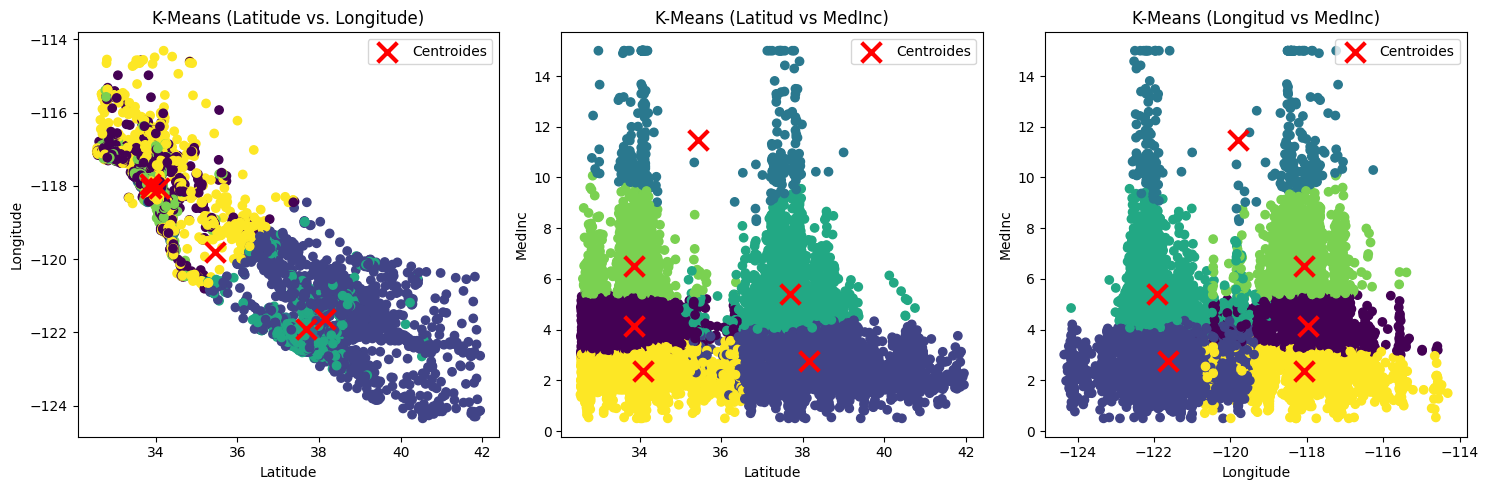

In [7]:
##LOS 3 GRAFICOS JUNTOS
#Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Latitude vs. Longitude
axes[0].scatter(X_train["Latitude"], X_train["Longitude"], c=etiquetas, cmap='viridis', marker='o')
axes[0].scatter(centroides[:, 1], centroides[:, 2], c='red', marker='x', s=200, linewidths=3, label='Centroides')
axes[0].set_title('K-Means (Latitude vs. Longitude)')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Longitude')
axes[0].legend()

# Gráfico 2: Latitude vs. MedInc
axes[1].scatter(X_train["Latitude"], X_train["MedInc"], c=etiquetas, cmap='viridis', marker='o')
axes[1].scatter(centroides[:, 1], centroides[:, 0], c='red', marker='x', s=200, linewidths=3, label='Centroides')  # Ajustar centroides para MedInc
axes[1].set_title('K-Means (Latitud vs MedInc)')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('MedInc')
axes[1].legend()

# Gráfico 3: Longitude vs. MedInc
axes[2].scatter(X_train["Longitude"], X_train["MedInc"], c=etiquetas, cmap='viridis', marker='o')
axes[2].scatter(centroides[:, 2], centroides[:, 0], c='red', marker='x', s=200, linewidths=3, label='Centroides')  # Ajustar centroides para MedInc
axes[2].set_title('K-Means (Longitud vs MedInc)')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('MedInc')
axes[2].legend()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

##Paso 3: Predicir con el conjunto de test

In [8]:
y_test = kmeans.predict(X_test)
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,5
3024,2.5313,35.14,-119.46,5
15663,3.4801,37.80,-122.44,1
20484,5.7376,34.28,-118.72,4
9814,3.7250,36.62,-121.93,1


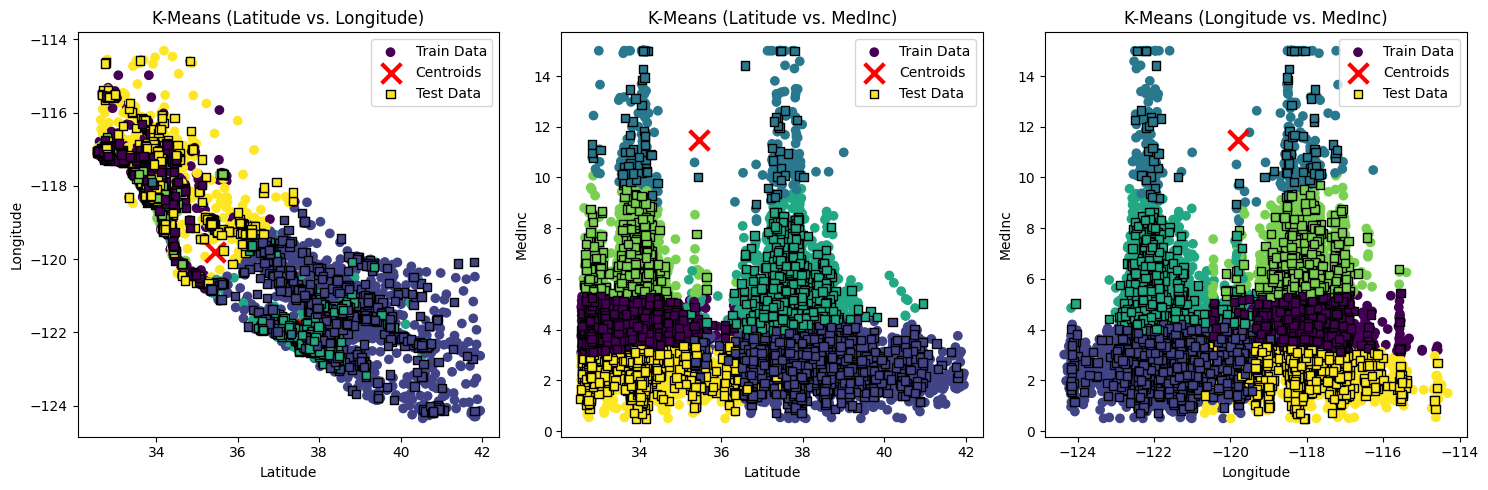

In [9]:
# Crea la figura y los ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graficar los datos de entrenamiento y los centroides para Latitude vs. Longitude
axes[0].scatter(X_train["Latitude"], X_train["Longitude"], c=X_train["cluster"], cmap='viridis', marker='o', label='Train Data')
axes[0].scatter(centroides[:, 1], centroides[:, 2], c='red', marker='x', s=200, linewidths=3, label='Centroids')
# Grafica los datos de prueba
axes[0].scatter(X_test["Latitude"], X_test["Longitude"], c=X_test["cluster"], cmap='viridis', marker='s', edgecolor='black', label='Test Data') # Agrega los datos de prueba
axes[0].set_title('K-Means (Latitude vs. Longitude)')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Longitude')
axes[0].legend()

# Repite el proceso para Latitude vs. MedInc
axes[1].scatter(X_train["Latitude"], X_train["MedInc"], c=X_train["cluster"], cmap='viridis', marker='o', label='Train Data')
axes[1].scatter(centroides[:, 1], centroides[:, 0], c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].scatter(X_test["Latitude"], X_test["MedInc"], c=X_test["cluster"], cmap='viridis', marker='s', edgecolor='black', label='Test Data') # Agrega los datos de prueba
axes[1].set_title('K-Means (Latitude vs. MedInc)')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('MedInc')
axes[1].legend()

# Repite el proceso para Longitude vs. MedInc
axes[2].scatter(X_train["Longitude"], X_train["MedInc"], c=X_train["cluster"], cmap='viridis', marker='o', label='Train Data')
axes[2].scatter(centroides[:, 2], centroides[:, 0], c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[2].scatter(X_test["Longitude"], X_test["MedInc"], c=X_test["cluster"], cmap='viridis', marker='s', edgecolor='black', label='Test Data') # Agrega los datos de prueba
axes[2].set_title('K-Means (Longitude vs. MedInc)')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('MedInc')
axes[2].legend()

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la figura
plt.show()

Nota: clasifico a los datos de Test correctamente

##Paso 4: Entrenar otros modelos de clasificación supervisada

In [10]:
#dividir variables y traget
y_train = X_train["cluster"]
X_train = X_train[["MedInc", "Latitude", "Longitude"]]

y_test = X_test["cluster"]
X_test = X_test[["MedInc", "Latitude", "Longitude"]]

###REGRESION LOGISTICA

In [11]:
#regresion Logistica
model_lr = LogisticRegression(random_state=666, max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1008
           1       0.96      0.97      0.96      1110
           2       0.99      0.97      0.98        74
           3       0.97      0.98      0.97       556
           4       0.98      0.96      0.97       361
           5       0.97      0.96      0.96      1019

    accuracy                           0.97      4128
   macro avg       0.97      0.97      0.97      4128
weighted avg       0.97      0.97      0.97      4128



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###SVM

In [12]:
#SVM
modelo_svm = SVC(random_state=666)
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1008
           1       0.83      1.00      0.91      1110
           2       1.00      0.14      0.24        74
           3       0.94      0.64      0.76       556
           4       0.75      0.34      0.47       361
           5       0.94      0.97      0.96      1019

    accuracy                           0.86      4128
   macro avg       0.88      0.67      0.70      4128
weighted avg       0.86      0.86      0.84      4128

